# Spectral Clustering

Spectral Clustering은 Graph 기반의 클러스터링 알고리즘입니다.  


data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)
data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)


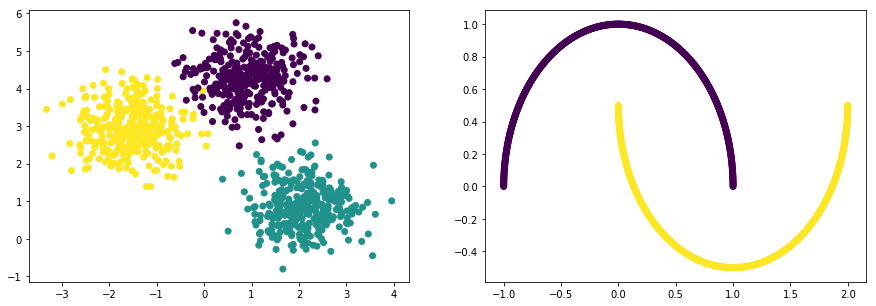


model=SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=10, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)
score=0.57139

model=SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=10, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)
score=0.33799


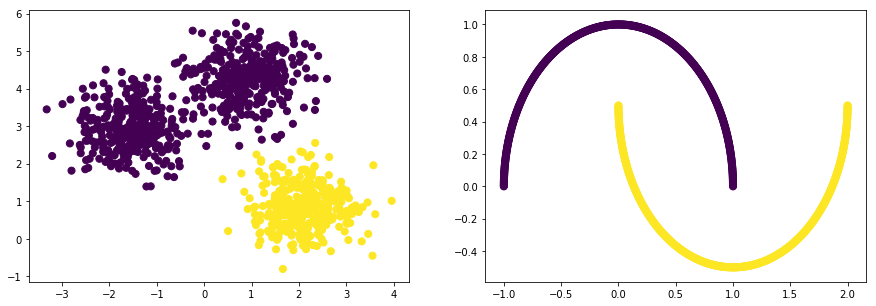


model=SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=10, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)
score=0.65324

model=SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=10, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=None)
score=0.43166


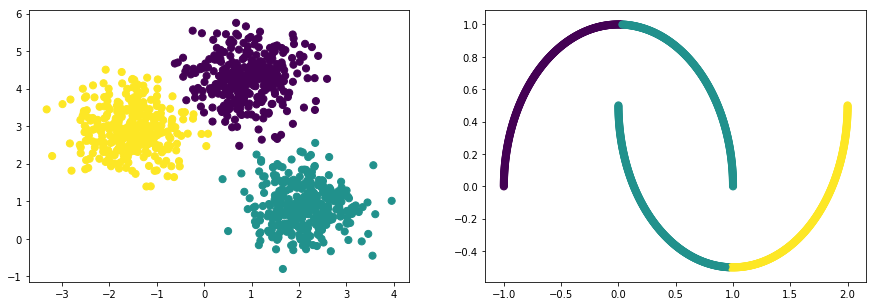

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, cluster, metrics

# 데이터
np.random.seed(0)
n_samples = 1000
plt.rcParams['figure.figsize'] = (15,5)

np_datasets = []
np_data_xs, np_data_ys = datasets.samples_generator.make_blobs(
    n_samples=n_samples,
    centers=3,
    cluster_std=0.60,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 1)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

np_data_xs, np_data_ys = datasets.make_moons(
    n_samples=n_samples,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 2)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

plt.show()

# 모델
models = [
    cluster.SpectralClustering(n_clusters=2, affinity='rbf', gamma=10),
    cluster.SpectralClustering(n_clusters=3, affinity='rbf', gamma=10)
]

for model in models:
    for i, np_dataset in enumerate(np_datasets):
        np_data_xs, np_data_ys = np_dataset[0], np_dataset[1]

        # 학습
        print("\nmodel={}".format(model))
        model.fit(np_data_xs)

        # 평가
        labels = model.labels_
        plt.subplot(1, 2, i+1)
        plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=labels, s=50, cmap='viridis')    

        score = metrics.silhouette_score(np_data_xs, labels, metric='euclidean')
        print("score={:.5f}".format(score))
    plt.show()